In [49]:
#import libraries
import pandas as pd
import numpy as np
from datetime import date


In [36]:
# Step 1: Load the Dataset
# ----------------------------------------
# File path to the CSV file
file_path = r"C:\Users\Kojo Kwakye\Downloads\SQL CLASS\Python_JupyterClass\bad_data.csv"

In [37]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [38]:
# Display the original dataset
print("Original DataFrame:")
print(df)


Original DataFrame:
    ID First_Name Last_Name   Age           City  Joined_Date   Salary  Gender
0    1      Alice     Smith  25.0       New York    1/15/2021  50000.0  Female
1    2        Bob     Brown  30.0    Los Angeles    1/20/2021      NaN       M
2    3    Charlie   Johnson  35.0        Chicago     3/1/2021  70000.0    Male
3    4      Alice     Smith  25.0       New York    1/15/2021  50000.0  Female
4    5        Eve       NaN   NaN  San Francisco    6/30/2021  45000.0  Female
5    6      Frank    Miller  -5.0          Miami    12/1/2021  80000.0    Male
6    7     George     White  45.0            NaN    9/10/2021  90000.0       M
7    8     Hannah     Davis  28.0         Dallas    9/15/2021 -30000.0  Female
8    9        NaN       NaN  40.0        Seattle  InvalidDate  60000.0     NaN
9   10      Jamol       Lee  50.0         Boston   11/22/2021  80000.0    Male
10  11     Faraha       Lee  50.0         Boston   12/20/2021  85000.0       F
11  12      Waris       Lee  50.

In [39]:
# Step 2: Clean the Dataset
# ----------------------------------------
# Handle/Remove Duplicates
# ----------------------------------------
# Check for duplicate IDs
duplicate_ids = df[df['ID'].duplicated()]
if duplicate_ids.empty:
    print("\nAll IDs are unique.")
else:
    print("\nDuplicate IDs found:")
    print(duplicate_ids)


All IDs are unique.


In [40]:
# Drop logical duplicates based on specific columns
df.drop_duplicates(subset=['First_Name', 'Last_Name', 'Age', 'City', 'Joined_Date', 'Salary', 'Gender'], inplace =True)

In [41]:
print(df)

    ID First_Name Last_Name   Age           City  Joined_Date   Salary  Gender
0    1      Alice     Smith  25.0       New York    1/15/2021  50000.0  Female
1    2        Bob     Brown  30.0    Los Angeles    1/20/2021      NaN       M
2    3    Charlie   Johnson  35.0        Chicago     3/1/2021  70000.0    Male
4    5        Eve       NaN   NaN  San Francisco    6/30/2021  45000.0  Female
5    6      Frank    Miller  -5.0          Miami    12/1/2021  80000.0    Male
6    7     George     White  45.0            NaN    9/10/2021  90000.0       M
7    8     Hannah     Davis  28.0         Dallas    9/15/2021 -30000.0  Female
8    9        NaN       NaN  40.0        Seattle  InvalidDate  60000.0     NaN
9   10      Jamol       Lee  50.0         Boston   11/22/2021  80000.0    Male
10  11     Faraha       Lee  50.0         Boston   12/20/2021  85000.0       F
11  12      Waris       Lee  50.0         Boston   12/25/2021  90000.0    Male
12  13       Eben       Lee  50.0         Boston   1

In [42]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())  # Fill missing Salary with mean
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing Age with median
df['City'] = df['City'].replace("", np.nan).fillna("Unknown")  # Replace empty City with 'Unknown'
df['First_Name'] = df['First_Name'].replace("", np.nan).fillna("Unknown")  # Replace empty City with 'Unknown'
df['Last_Name'] = df['Last_Name'].replace("", np.nan).fillna("Unknown")  # Replace empty City with 'Unknown'

In [43]:
print(df)

    ID First_Name Last_Name   Age           City  Joined_Date   Salary  Gender
0    1      Alice     Smith  25.0       New York    1/15/2021  50000.0  Female
1    2        Bob     Brown  30.0    Los Angeles    1/20/2021  65000.0       M
2    3    Charlie   Johnson  35.0        Chicago     3/1/2021  70000.0    Male
4    5        Eve   Unknown  40.0  San Francisco    6/30/2021  45000.0  Female
5    6      Frank    Miller  -5.0          Miami    12/1/2021  80000.0    Male
6    7     George     White  45.0        Unknown    9/10/2021  90000.0       M
7    8     Hannah     Davis  28.0         Dallas    9/15/2021 -30000.0  Female
8    9    Unknown   Unknown  40.0        Seattle  InvalidDate  60000.0     NaN
9   10      Jamol       Lee  50.0         Boston   11/22/2021  80000.0    Male
10  11     Faraha       Lee  50.0         Boston   12/20/2021  85000.0       F
11  12      Waris       Lee  50.0         Boston   12/25/2021  90000.0    Male
12  13       Eben       Lee  50.0         Boston   1

In [44]:
# Handle negative values
df['Salary'] = df['Salary'].apply(lambda x: x if x >= 0 else np.nan).fillna(df['Salary'].mean())
df['Age'] = df['Age'].apply(lambda x: x if x > 0 else np.nan).fillna(df['Age'].median())
print(df)

    ID First_Name Last_Name   Age           City  Joined_Date   Salary  Gender
0    1      Alice     Smith  25.0       New York    1/15/2021  50000.0  Female
1    2        Bob     Brown  30.0    Los Angeles    1/20/2021  65000.0       M
2    3    Charlie   Johnson  35.0        Chicago     3/1/2021  70000.0    Male
4    5        Eve   Unknown  40.0  San Francisco    6/30/2021  45000.0  Female
5    6      Frank    Miller  40.0          Miami    12/1/2021  80000.0    Male
6    7     George     White  45.0        Unknown    9/10/2021  90000.0       M
7    8     Hannah     Davis  28.0         Dallas    9/15/2021  65000.0  Female
8    9    Unknown   Unknown  40.0        Seattle  InvalidDate  60000.0     NaN
9   10      Jamol       Lee  50.0         Boston   11/22/2021  80000.0    Male
10  11     Faraha       Lee  50.0         Boston   12/20/2021  85000.0       F
11  12      Waris       Lee  50.0         Boston   12/25/2021  90000.0    Male
12  13       Eben       Lee  50.0         Boston   1

In [45]:
# Standardize Gender values
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'}).fillna("Unknown")
print(df)

    ID First_Name Last_Name   Age           City  Joined_Date   Salary  \
0    1      Alice     Smith  25.0       New York    1/15/2021  50000.0   
1    2        Bob     Brown  30.0    Los Angeles    1/20/2021  65000.0   
2    3    Charlie   Johnson  35.0        Chicago     3/1/2021  70000.0   
4    5        Eve   Unknown  40.0  San Francisco    6/30/2021  45000.0   
5    6      Frank    Miller  40.0          Miami    12/1/2021  80000.0   
6    7     George     White  45.0        Unknown    9/10/2021  90000.0   
7    8     Hannah     Davis  28.0         Dallas    9/15/2021  65000.0   
8    9    Unknown   Unknown  40.0        Seattle  InvalidDate  60000.0   
9   10      Jamol       Lee  50.0         Boston   11/22/2021  80000.0   
10  11     Faraha       Lee  50.0         Boston   12/20/2021  85000.0   
11  12      Waris       Lee  50.0         Boston   12/25/2021  90000.0   
12  13       Eben       Lee  50.0         Boston   10/20/2021  95000.0   

     Gender  
0    Female  
1      Ma

In [75]:
# Convert Joined_Date to datetime format
df['Joined_Date'] = pd.to_datetime(df['Joined_Date'], errors='coerce')
print(df)

    ID First_Name Last_Name   Age           City Joined_Date   Salary  \
0    1      Alice     Smith  25.0       New York  2021-01-15  50000.0   
1    2        Bob     Brown  30.0    Los Angeles  2021-01-20  65000.0   
2    3    Charlie   Johnson  35.0        Chicago  2021-03-01  70000.0   
3    5        Eve   Unknown  40.0  San Francisco  2021-06-30  45000.0   
4    6      Frank    Miller  40.0          Miami  2021-12-01  80000.0   
5    7     George     White  45.0        Unknown  2021-09-10  90000.0   
6    8     Hannah     Davis  28.0         Dallas  2021-09-15  65000.0   
7    9    Unknown   Unknown  40.0        Seattle  2021-01-15  60000.0   
8   10      Jamol       Lee  50.0         Boston  2021-11-22  80000.0   
9   11     Faraha       Lee  50.0         Boston  2021-12-20  85000.0   
10  12      Waris       Lee  50.0         Boston  2021-12-25  90000.0   
11  13       Eben       Lee  50.0         Boston  2021-10-20  95000.0   

     Gender  Joined_Year        Full_Name Age_Grou

In [51]:
#Check for Invalid Dates
invalid_Dates = df[df['Joined_Date'].isna()]
if not invalid_Dates.empty:
    print("\n\Rows with invalid dates:")
    print(invalid_Dates)



\Rows with invalid dates:
   ID First_Name Last_Name   Age     City Joined_Date   Salary   Gender
8   9    Unknown   Unknown  40.0  Seattle         NaT  60000.0  Unknown


<>:4: SyntaxWarning: invalid escape sequence '\R'
<>:4: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Kojo Kwakye\AppData\Local\Temp\ipykernel_2388\718097653.py:4: SyntaxWarning: invalid escape sequence '\R'
  print("\n\Rows with invalid dates:")


In [52]:
#calculate the most common  ( mode) date
most_common_date = df['Joined_Date'].mode()[0]

#Fill invalid dates (NaT) with most common valid date
df['Joined_Date'].fillna(most_common_date, inplace = True)

print(df)

    ID First_Name Last_Name   Age           City Joined_Date   Salary   Gender
0    1      Alice     Smith  25.0       New York  2021-01-15  50000.0   Female
1    2        Bob     Brown  30.0    Los Angeles  2021-01-20  65000.0     Male
2    3    Charlie   Johnson  35.0        Chicago  2021-03-01  70000.0     Male
4    5        Eve   Unknown  40.0  San Francisco  2021-06-30  45000.0   Female
5    6      Frank    Miller  40.0          Miami  2021-12-01  80000.0     Male
6    7     George     White  45.0        Unknown  2021-09-10  90000.0     Male
7    8     Hannah     Davis  28.0         Dallas  2021-09-15  65000.0   Female
8    9    Unknown   Unknown  40.0        Seattle  2021-01-15  60000.0  Unknown
9   10      Jamol       Lee  50.0         Boston  2021-11-22  80000.0     Male
10  11     Faraha       Lee  50.0         Boston  2021-12-20  85000.0   Female
11  12      Waris       Lee  50.0         Boston  2021-12-25  90000.0     Male
12  13       Eben       Lee  50.0         Boston  20

C:\Users\Kojo Kwakye\AppData\Local\Temp\ipykernel_2388\3184929554.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Joined_Date'].fillna(most_common_date, inplace = True)


In [54]:
# Scenario 1: Normalize text columns (e.g., First_Name, Last_Name)
df['First_Name'] = df['First_Name'].str.strip().str.title()  # Remove leading/trailing spaces and capitalize
df['Last_Name'] = df['Last_Name'].str.strip().str.title()
print(df)

    ID First_Name Last_Name   Age           City Joined_Date   Salary   Gender
0    1      Alice     Smith  25.0       New York  2021-01-15  50000.0   Female
1    2        Bob     Brown  30.0    Los Angeles  2021-01-20  65000.0     Male
2    3    Charlie   Johnson  35.0        Chicago  2021-03-01  70000.0     Male
4    5        Eve   Unknown  40.0  San Francisco  2021-06-30  45000.0   Female
5    6      Frank    Miller  40.0          Miami  2021-12-01  80000.0     Male
6    7     George     White  45.0        Unknown  2021-09-10  90000.0     Male
7    8     Hannah     Davis  28.0         Dallas  2021-09-15  65000.0   Female
8    9    Unknown   Unknown  40.0        Seattle  2021-01-15  60000.0  Unknown
9   10      Jamol       Lee  50.0         Boston  2021-11-22  80000.0     Male
10  11     Faraha       Lee  50.0         Boston  2021-12-20  85000.0   Female
11  12      Waris       Lee  50.0         Boston  2021-12-25  90000.0     Male
12  13       Eben       Lee  50.0         Boston  20

In [56]:
# Scenario 4: Extract Year from Joined_Date
df['Joined_Year'] = df['Joined_Date'].dt.year
print(df)

    ID First_Name Last_Name   Age           City Joined_Date   Salary  \
0    1      Alice     Smith  25.0       New York  2021-01-15  50000.0   
1    2        Bob     Brown  30.0    Los Angeles  2021-01-20  65000.0   
2    3    Charlie   Johnson  35.0        Chicago  2021-03-01  70000.0   
4    5        Eve   Unknown  40.0  San Francisco  2021-06-30  45000.0   
5    6      Frank    Miller  40.0          Miami  2021-12-01  80000.0   
6    7     George     White  45.0        Unknown  2021-09-10  90000.0   
7    8     Hannah     Davis  28.0         Dallas  2021-09-15  65000.0   
8    9    Unknown   Unknown  40.0        Seattle  2021-01-15  60000.0   
9   10      Jamol       Lee  50.0         Boston  2021-11-22  80000.0   
10  11     Faraha       Lee  50.0         Boston  2021-12-20  85000.0   
11  12      Waris       Lee  50.0         Boston  2021-12-25  90000.0   
12  13       Eben       Lee  50.0         Boston  2021-10-20  95000.0   

     Gender  Joined_Year  
0    Female         202

In [58]:
# Combine First_Name and Last_Name into Full_Name
df['Full_Name'] = df['First_Name'] + " " + df['Last_Name']
print(df)

    ID First_Name Last_Name   Age           City Joined_Date   Salary  \
0    1      Alice     Smith  25.0       New York  2021-01-15  50000.0   
1    2        Bob     Brown  30.0    Los Angeles  2021-01-20  65000.0   
2    3    Charlie   Johnson  35.0        Chicago  2021-03-01  70000.0   
4    5        Eve   Unknown  40.0  San Francisco  2021-06-30  45000.0   
5    6      Frank    Miller  40.0          Miami  2021-12-01  80000.0   
6    7     George     White  45.0        Unknown  2021-09-10  90000.0   
7    8     Hannah     Davis  28.0         Dallas  2021-09-15  65000.0   
8    9    Unknown   Unknown  40.0        Seattle  2021-01-15  60000.0   
9   10      Jamol       Lee  50.0         Boston  2021-11-22  80000.0   
10  11     Faraha       Lee  50.0         Boston  2021-12-20  85000.0   
11  12      Waris       Lee  50.0         Boston  2021-12-25  90000.0   
12  13       Eben       Lee  50.0         Boston  2021-10-20  95000.0   

     Gender  Joined_Year        Full_Name  
0    F

In [59]:
# Create an Age_Group column
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 40, 60], labels=['Youth', 'Adult', 'Senior'])
print(df)

    ID First_Name Last_Name   Age           City Joined_Date   Salary  \
0    1      Alice     Smith  25.0       New York  2021-01-15  50000.0   
1    2        Bob     Brown  30.0    Los Angeles  2021-01-20  65000.0   
2    3    Charlie   Johnson  35.0        Chicago  2021-03-01  70000.0   
4    5        Eve   Unknown  40.0  San Francisco  2021-06-30  45000.0   
5    6      Frank    Miller  40.0          Miami  2021-12-01  80000.0   
6    7     George     White  45.0        Unknown  2021-09-10  90000.0   
7    8     Hannah     Davis  28.0         Dallas  2021-09-15  65000.0   
8    9    Unknown   Unknown  40.0        Seattle  2021-01-15  60000.0   
9   10      Jamol       Lee  50.0         Boston  2021-11-22  80000.0   
10  11     Faraha       Lee  50.0         Boston  2021-12-20  85000.0   
11  12      Waris       Lee  50.0         Boston  2021-12-25  90000.0   
12  13       Eben       Lee  50.0         Boston  2021-10-20  95000.0   

     Gender  Joined_Year        Full_Name Age_Grou

In [60]:
import os
print("Current Working Directory:", os.getcwd())   

Current Working Directory: C:\Users\Kojo Kwakye


In [62]:
# Save the cleaned dataset to a CSV file
df.to_csv("employee_data.csv", index=False)


In [67]:
df.to_csv(r'C:\Users\Kojo Kwakye\Desktop\employee_dataset.csv', index = False)  

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:

# Load the cleaned dataset
file_path = r"C:\Users\Kojo Kwakye\Desktop\employee_dataset.csv"  # Ensure this file exists in your directory

In [70]:
df = pd.read_csv(file_path)   #this will read the cleaned csv file that was saved and store it in df now to be used for analysis

In [71]:
print(df)

    ID First_Name Last_Name   Age           City Joined_Date   Salary  \
0    1      Alice     Smith  25.0       New York  2021-01-15  50000.0   
1    2        Bob     Brown  30.0    Los Angeles  2021-01-20  65000.0   
2    3    Charlie   Johnson  35.0        Chicago  2021-03-01  70000.0   
3    5        Eve   Unknown  40.0  San Francisco  2021-06-30  45000.0   
4    6      Frank    Miller  40.0          Miami  2021-12-01  80000.0   
5    7     George     White  45.0        Unknown  2021-09-10  90000.0   
6    8     Hannah     Davis  28.0         Dallas  2021-09-15  65000.0   
7    9    Unknown   Unknown  40.0        Seattle  2021-01-15  60000.0   
8   10      Jamol       Lee  50.0         Boston  2021-11-22  80000.0   
9   11     Faraha       Lee  50.0         Boston  2021-12-20  85000.0   
10  12      Waris       Lee  50.0         Boston  2021-12-25  90000.0   
11  13       Eben       Lee  50.0         Boston  2021-10-20  95000.0   

     Gender  Joined_Year        Full_Name Age_Grou

C:\Users\Kojo Kwakye\AppData\Local\Temp\ipykernel_2388\776658889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


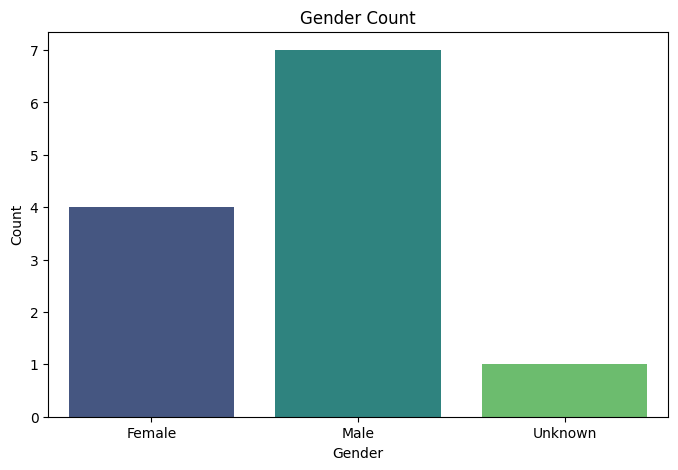

In [73]:
# 2. Gender Count
# ----------------------------------------
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



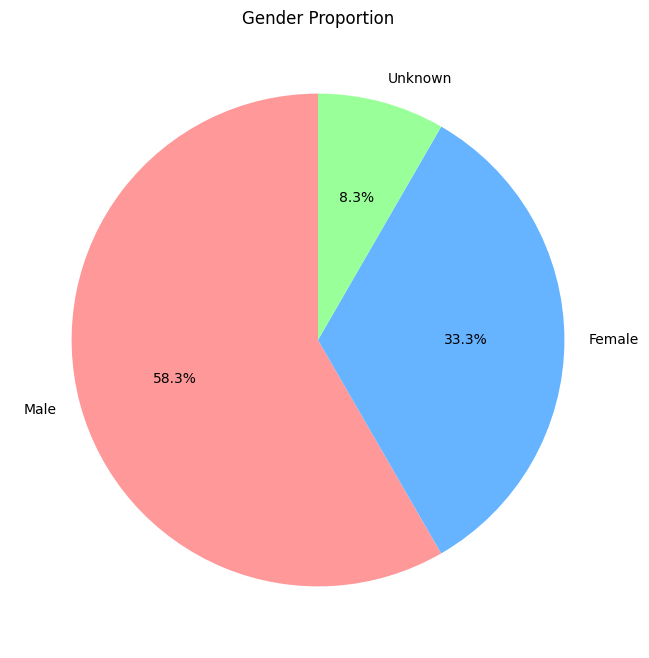

In [72]:
# 10. Pie Chart: Proportion of Gender
# ----------------------------------------
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Gender Proportion')
plt.show()

In [ ]:
'''
This pie chart above represents the gender distribution within the employee dataset. Here's a breakdown of the result:
Male: 58.3% of the entries belong to males, which is the largest portion of the dataset.
Female: 33.3% of the entries are female.
Unknown: 8.3% of the entries have an unknown gender, indicating missing or undefined values in the dataset.
This distribution provides an overview of gender representation within the dataset, with a notable percentage of unknown entries that may need further handling or clarification.

'''

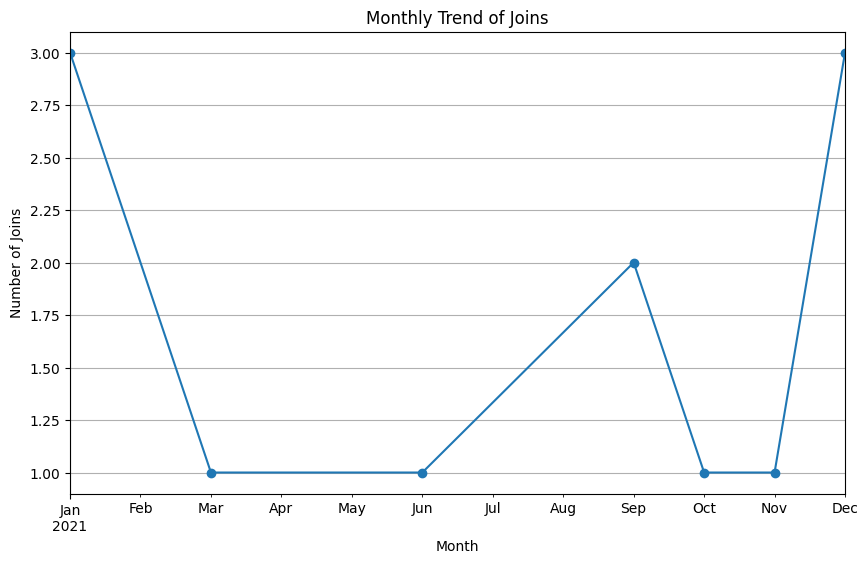

In [76]:
# 6. Monthly Join Trend
# ----------------------------------------
monthly_joined = df.groupby(df['Joined_Date'].dt.to_period('M')).size()
plt.figure(figsize=(10, 6))
monthly_joined.plot(kind='line', marker='o')
plt.title('Monthly Trend of Joins')
plt.xlabel('Month')
plt.ylabel('Number of Joins')
plt.grid(True)
plt.show()


C:\Users\Kojo Kwakye\AppData\Local\Temp\ipykernel_2388\2895269415.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Salary', data=top_cities, palette='Blues_d')


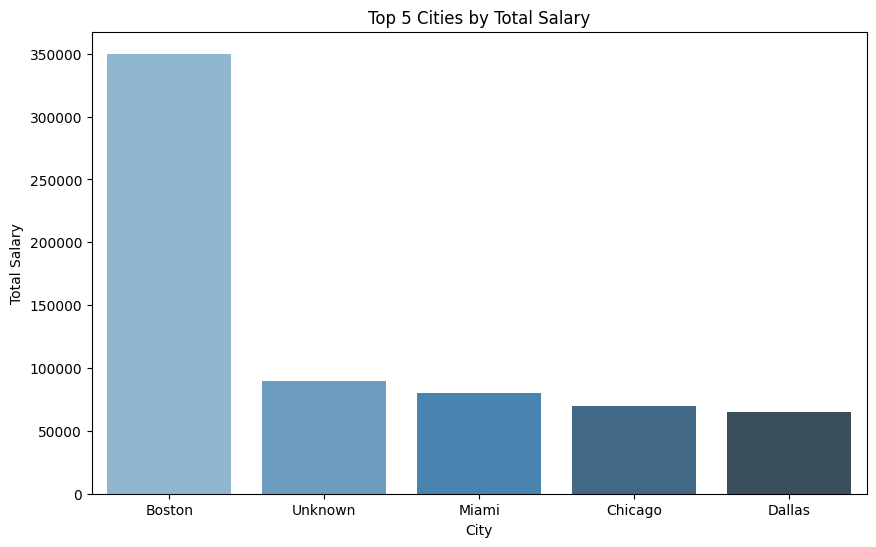

In [77]:
# 9. Top 5 Cities by Salary Sum
# ----------------------------------------
top_cities = df.groupby('City')['Salary'].sum().nlargest(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Salary', data=top_cities, palette='Blues_d')
plt.title('Top 5 Cities by Total Salary')
plt.xlabel('City')
plt.ylabel('Total Salary')
plt.show()


In [ ]:
'''
This bar chart above shows the total salary by city. Boston has the highest total salary, significantly outperforming other cities. 
Unknown entries follow, likely due to missing city data. Miami, Chicago, and Dallas have relatively low total salaries.
'''

C:\Users\Kojo Kwakye\AppData\Local\Temp\ipykernel_2388\1607444458.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=df, palette='muted', order=['Youth', 'Adult', 'Senior'])


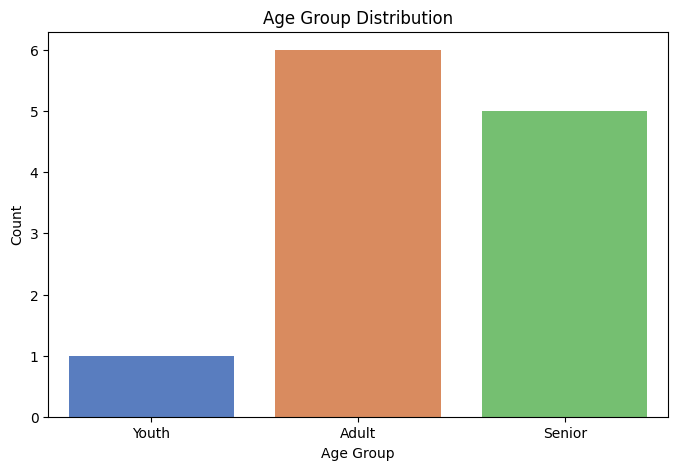

In [78]:
# 4. Bar Chart -  Age Group Distribution
# ----------------------------------------
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', data=df, palette='muted', order=['Youth', 'Adult', 'Senior'])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
'''
This bar chart above shows the distribution of employees across different age groups:
Youth: Only one employee falls into the "Youth" category, the smallest group.
Adult: The largest group, with the most employees, is in the "Adult" category.
Senior: There are a few employees in the "Senior" age group, with a moderate count.
The chart highlights that most employees in the dataset fall under the "Adult" category.
'''

C:\Users\Kojo Kwakye\AppData\Local\Temp\ipykernel_2388\2355667305.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City', y='Salary', data=df, ci=None, palette='rocket')
C:\Users\Kojo Kwakye\AppData\Local\Temp\ipykernel_2388\2355667305.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Salary', data=df, ci=None, palette='rocket')


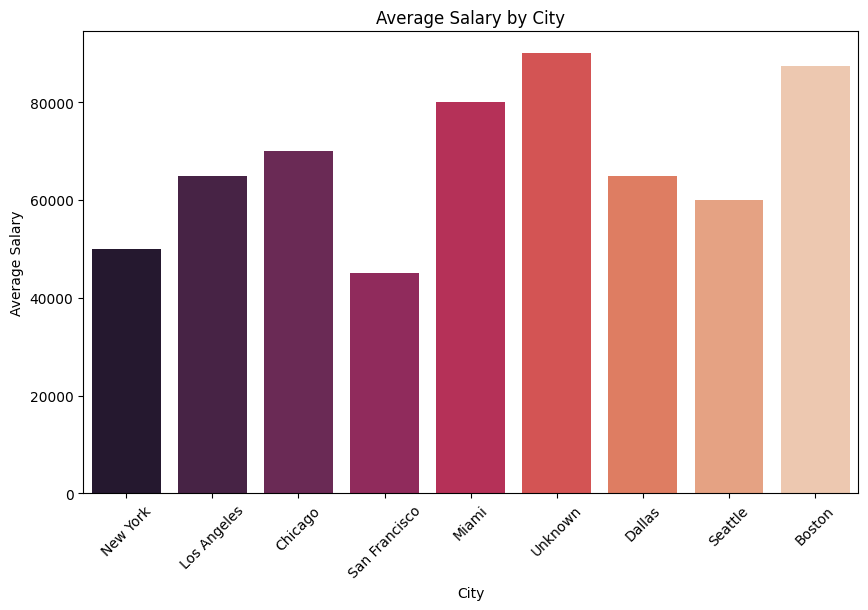

In [79]:
# 5. Average Salary by City
# ----------------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Salary', data=df, ci=None, palette='rocket')
plt.title('Average Salary by City')
plt.xlabel('City')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

In [ ]:
'''
This bar chart above displays the average salary by city, showing the following:

Miami has the highest average salary, followed closely by Boston and New York.
Los Angeles, Chicago, and San Francisco also show relatively high average salaries, but they are a bit lower than the top three cities.
Seattle and Dallas have lower average salaries compared to the other cities.
Unknown represents missing city data, which shows a moderately high average salary compared to some cities.
Overall, the chart indicates that Miami has the highest average salary, while the "Unknown" category likely includes entries that need further clarification.
'''

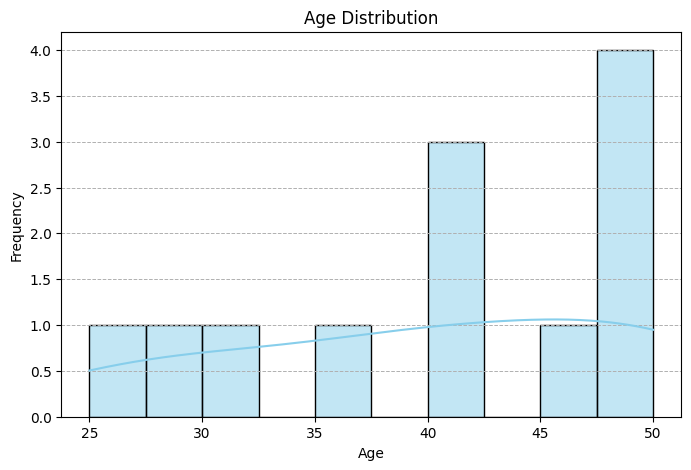

In [80]:
# 1. Distribution of Age
# ----------------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


In [ ]:
'''
This histogram above shows the distribution of employee ages:

The age group around 40 stands out, with the highest frequency, indicating that most employees in the dataset are in their 40s.
Ages 25-35 have relatively low frequency, with only a few employees falling into those age groups.
Ages 45-50 also show a moderate frequency, with a slight peak at age 50.
The blue line represents a trend of age distribution, which is relatively flat for most ages but slightly increases for the 40-50 range, aligning with the histogram's peaks. 
This indicates that the majority of employees are concentrated in the 40-50 age range.
'''

In [2]:
import os
print(os.getcwd())

C:\Users\Kojo Kwakye
